In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

from sklearn.base import BaseEstimator, TransformerMixin
# Transormador para codificar únicamente las columnas categoricas y devolver un DataFrame
class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
# Cargar el conjunto de datos de entrenamiento
with open("datasets/daass-02.txt") as train_set:
    df_train = train_set.readlines()
df_train= pd.read_csv("datasets/daass-02.txt")

# Cargar el conjunto de datos de prueba
with open("datasets/daass-01.txt") as train_set2:
    df_test = train_set2.readlines()
df_test= pd.read_csv("datasets/daass-01.txt")


with open("datasets/train.txt") as train_set3:
    df = train_set3.readlines()
df= pd.read_csv("datasets/train.txt")

with open("datasets/ddos-01.txt") as train_set4:
    df_ddos = train_set4.readlines()
df_ddos= pd.read_csv("datasets/ddos-01.txt")




In [4]:
df_train["target"].value_counts()

1    120888
0      1352
2        63
Name: target, dtype: int64

In [5]:
X_train = df_train.drop("target", axis=1)
y_train = df_train["target"].copy()

X_train['Puerto'] = X_train['Puerto'].astype('object')
X_train['Prot'] = X_train['Prot'].astype('object')
X_train = X_train.drop(['ID'], axis=1)
X_train = X_train.drop(['IP'], axis=1)
X_train = X_train.drop(['Prot'], axis=1)



ddos = df_ddos.drop("target", axis=1)
y_ddos = df_ddos["target"].copy()

ddos['Puerto'] = ddos['Puerto'].astype('object')
ddos['Prot'] = ddos['Prot'].astype('object')
ddos = ddos.drop(['ID'], axis=1)
ddos = ddos.drop(['IP'], axis=1)
ddos = ddos.drop(['Prot'], axis=1)








train = df.copy()
train = train.drop(['IP'], axis=1)
train['Puerto'] = train['Puerto'].astype('object')
train['Prot'] = train['Prot'].astype('object')
train = train.drop(['Prot'], axis=1)





X_test = df_test.drop("target", axis=1)
y_test = df_test["target"].copy()

X_test['Puerto'] = X_test['Puerto'].astype('object')
X_test['Prot'] = X_test['Prot'].astype('object')
X_test = X_test.drop(['ID'], axis=1)
X_test = X_test.drop(['IP'], axis=1)
X_test = X_test.drop(['Prot'], axis=1)

In [6]:
from sklearn.preprocessing import OneHotEncoder
customOneHot = CustomOneHotEncoding()
X_train_prep = customOneHot.fit_transform(X_train)

customOneHot = CustomOneHotEncoding()
ddos_prep = customOneHot.fit_transform(ddos)

customOneHot = CustomOneHotEncoding()
train_prep = customOneHot.fit_transform(train)



customOneHot = CustomOneHotEncoding()
X_test_prep = customOneHot.fit_transform(X_test)

C:\Users\X571\AppData\Local\Temp\ipykernel_7472\2648995292.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  self._columns = pd.get_dummies(X_cat).columns
C:\Users\X571\anaconda3\envs\CursoMachineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\X571\AppData\Local\Temp\ipykernel_7472\2648995292.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  self._columns = pd.get_dummies(X_cat).columns
C:\Users\X571\anaconda3\envs\CursoMachineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 

# SVM

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

data = pd.concat([X_train_prep, y_train], axis=1)
data['target'] = data['target'].replace({1: 0, 2: 1})

data2 = pd.concat([X_test_prep, y_test], axis=1)
data2['target'] = data2['target'].replace({1: 0, 2: 1})

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('target', axis=1)
y = data['target']

X_t = data2.drop('target', axis=1)
y_t = data2['target']

# Escalar los datos
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)




# Crear un clasificador SVM
svm = SVC(kernel='linear')

# Entrenar el modelo SVM
svm.fit(X, y)

# Predecir las etiquetas para el conjunto de prueba
y_pred = svm.predict(X_t)

precision = precision_score(y_t, y_pred)
recall = recall_score(y_t, y_pred)

print("Precisión:", precision)
print("Exhaustividad:", recall)

# Calcular el F1-score
f1score = f1_score(y_t, y_pred)
print("F1-score del modelo SVM:", f1score)

Precisión: 0.8333333333333334
Exhaustividad: 0.9259259259259259
F1-score del modelo SVM: 0.8771929824561403


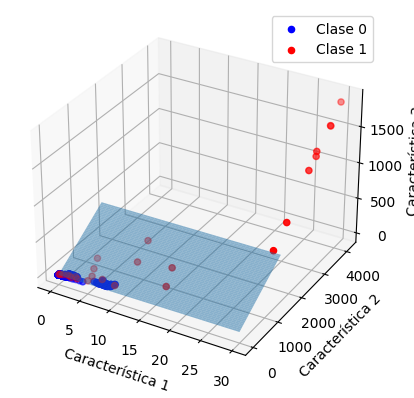

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()




#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])
#ax.view_init(elev=30, azim=90)







# Mostrar la gráfica en 3D
plt.show()


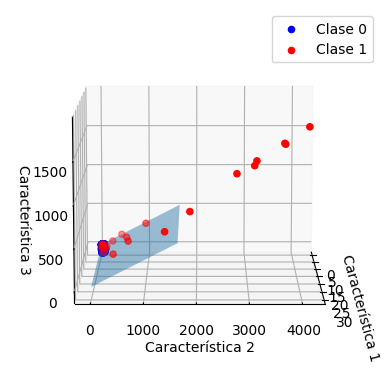

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()




#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])
ax.view_init(elev=10, azim=360)







# Mostrar la gráfica en 3D
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()




#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])
ax.view_init(elev=0, azim=360)







# Mostrar la gráfica en 3D
plt.show()


## BUENO

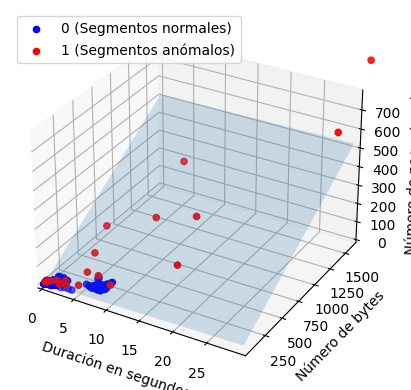

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='0 (Segmentos normales)')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='1 (Segmentos anómalos)')

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.2)

# Etiquetas de los ejes
ax.set_xlabel('Duración en segundos')
ax.set_ylabel('Número de bytes')
ax.set_zlabel('Número de paquetes down')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 1000])
#ax.set_zlim([0, 600])
#ax.view_init(elev=15, azim=-210)



plt.savefig('hiper_normal.png', format='png')



# Mostrar la gráfica en 3D
plt.show()


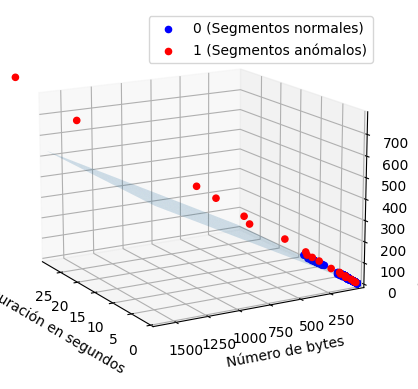

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D sin transparencia
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='0 (Segmentos normales)', alpha=1.0)
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='1 (Segmentos anómalos)', alpha=1.0)

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.2)

# Etiquetas de los ejes
ax.set_xlabel('Duración en segundos')
ax.set_ylabel('Número de bytes')
ax.set_zlabel('Número de paquetes down')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 1000])
#ax.set_zlim([0, 600])
ax.view_init(elev=15, azim=-210)

plt.savefig('hiper_normal_.png', format='png')

# Mostrar la gráfica en 3D
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


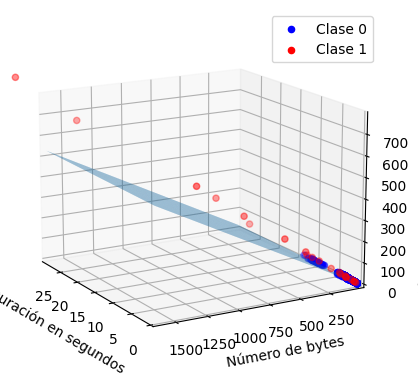

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Duración en segundos')
ax.set_ylabel('Número de bytes')
ax.set_zlabel('Número de paquetes down')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 1000])
#ax.set_zlim([0, 600])
ax.view_init(elev=15, azim=-210)



plt.savefig('hiper_zoom.eps', format='eps')



# Mostrar la gráfica en 3D
plt.show()


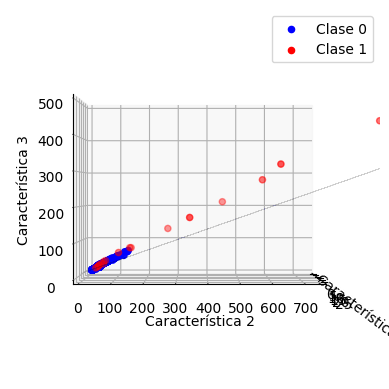

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
ax.set_ylim([0, 750])
ax.set_zlim([0, 500])
ax.view_init(elev=0, azim=360)







# Mostrar la gráfica en 3D
plt.show()


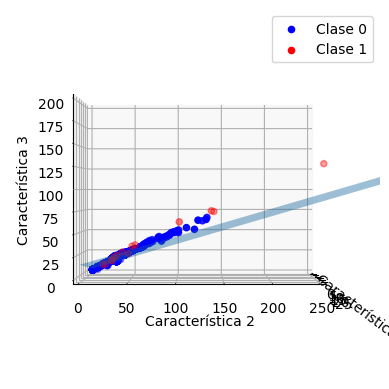

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
ax.set_ylim([0, 250])
ax.set_zlim([0, 200])
ax.view_init(elev=0, azim=360)







# Mostrar la gráfica en 3D
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


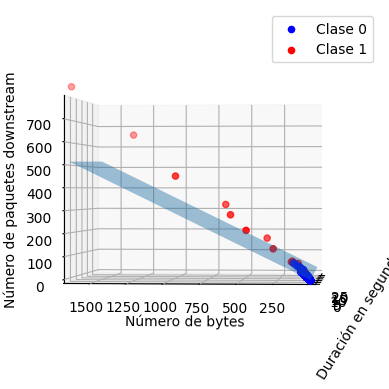

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Duración en segundos')
ax.set_ylabel('Número de bytes')
ax.set_zlabel('Número de paquetes downstream')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 750])
#ax.set_zlim([0, 400])
ax.view_init(elev=0, azim=185)




plt.savefig('hiper_muchozoom1.eps', format='eps')



# Mostrar la gráfica en 3D
plt.show()


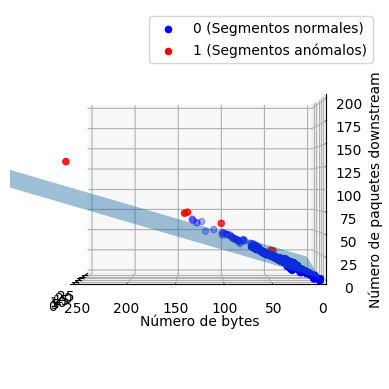

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='0 (Segmentos normales)')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='1 (Segmentos anómalos)')

# Ajustar los límites de los ejes x, y, z
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(X.iloc[:, 1].min(), X.iloc[:, 1].max())
ax.set_zlim(X.iloc[:, 2].min(), X.iloc[:, 2].max())

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes

ax.set_ylabel('Número de bytes')
ax.set_zlabel('Número de paquetes downstream')

# Leyenda de las clases
ax.legend()

#ax.set_xlim([9e6, 9.2e6])
ax.set_ylim([0, 250])
ax.set_zlim([0, 200])
ax.view_init(elev=0, azim=180)




plt.savefig('hiper_muchozoom_nuevo.png', format='png')



# Mostrar la gráfica en 3D
plt.show()


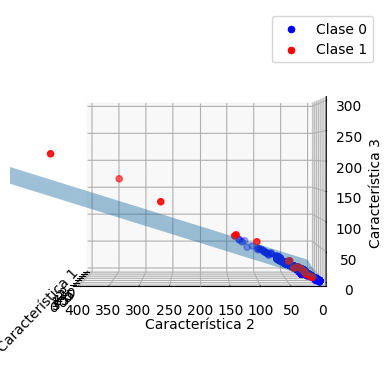

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()




#ax.set_xlim([9e6, 9.2e6])
ax.set_ylim([0, 400])
ax.set_zlim([0, 300])
ax.view_init(elev=1, azim=180)







# Mostrar la gráfica en 3D
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tienes un DataFrame 'X' con las características y una Serie 'y' con las etiquetas

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las características para las clases 0 y 1
X_class0 = X_t[y_t == 0]
X_class1 = X_t[y_t == 1]

# Graficar los puntos de cada clase en 3D
ax.scatter(X_class0.iloc[:, 0], X_class0.iloc[:, 1], X_class0.iloc[:, 2], c='blue', label='Clase 0')
ax.scatter(X_class1.iloc[:, 0], X_class1.iloc[:, 1], X_class1.iloc[:, 2], c='red', label='Clase 1')

# Crear una malla de puntos en el espacio 3D
x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50)
y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50)
x, y = np.meshgrid(x, y)

# Obtener los valores correspondientes de la tercera característica utilizando el límite de decisión del modelo SVM
z = (-svm.intercept_[0] - svm.coef_[0][0] * x - svm.coef_[0][1] * y) / svm.coef_[0][2]

# Graficar el límite de decisión en 3D
ax.plot_surface(x, y, z, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')

# Leyenda de las clases
ax.legend()




#ax.set_xlim([9e6, 9.2e6])
#ax.set_ylim([0, 7])
#ax.set_zlim([0, 2])
ax.view_init(elev=30, azim=90)







# Mostrar la gráfica en 3D
plt.show()


# ARBOL DE DECISION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

data = pd.concat([X_train_prep, y_train], axis=1)
data['target'] = data['target'].replace({1: 0, 2: 1})

data2 = pd.concat([X_test_prep, y_test], axis=1)
data2['target'] = data2['target'].replace({1: 0, 2: 1})


# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('target', axis=1)
y = data['target']

X_t = data2.drop('target', axis=1)
y_t = data2['target']










# Crear el clasificador de Árbol de Decisión
dt = DecisionTreeClassifier()

# Entrenar el modelo
dt.fit(X, y)

# Predecir las etiquetas para el conjunto de prueba
y_pred = dt.predict(X_t)

# Calcular la precisión y F1-score
accuracy = accuracy_score(y_t, y_pred)
f1score = f1_score(y_t, y_pred)

# Imprimir los resultados
precision = precision_score(y_t, y_pred)
recall = recall_score(y_t, y_pred)

print("Precisión:", precision)
print("Exhaustividad:", recall)

print("Precisión del modelo de Árbol de Decisión:", accuracy)
print("F1-score del modelo de Árbol de Decisión:", f1score)

# RANDOM FOREST

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

data = pd.concat([X_train_prep, y_train], axis=1)
data['target'] = data['target'].replace({1: 0, 2: 1})

data2 = pd.concat([X_test_prep, y_test], axis=1)
data2['target'] = data2['target'].replace({1: 0, 2: 1})


# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('target', axis=1)
y = data['target']

X_t = data2.drop('target', axis=1)
y_t = data2['target']







# Crear el clasificador de Random Forest
rf = RandomForestClassifier()

# Entrenar el modelo
rf.fit(X, y)

# Predecir las etiquetas para el conjunto de prueba
y_pred = rf.predict(X_t)

# Calcular la precisión y F1-score
accuracy = accuracy_score(y_t, y_pred)
f1score = f1_score(y_t, y_pred)

precision = precision_score(y_t, y_pred)
recall = recall_score(y_t, y_pred)

print("Precisión:", precision)
print("Exhaustividad:", recall)

# Imprimir los resultados
print("Precisión del modelo de Random Forest:", accuracy)
print("F1-score del modelo de Random Forest:", f1score)


Precisión: 1.0
Exhaustividad: 0.8148148148148148
Precisión del modelo de Random Forest: 0.999957981074676
F1-score del modelo de Random Forest: 0.8979591836734693


In [26]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(X_test), rf.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

up_pkt_bytes                         0.220744
pkt_bytes                            0.196555
dn_num_pkts                          0.149848
Dur                                  0.126345
Puerto                               0.073286
num_pkt                              0.070818
up_num_pkts                          0.064984
concurrent_pflow_avg_num_pkts        0.016547
concurrent_pflow_up_avg_pkt_bytes    0.015464
concurrent_pflow_dn_avg_num_pkts     0.013507
concurrent_pflow_avg_pkt_bytes       0.009909
concurrent_pflows                    0.009791
concurrent_pflow_dn_avg_pkt_bytes    0.009223
concurrent_pflow_up_avg_num_pkts     0.008641
dn_pkt_bytes                         0.004487
dtype: float64

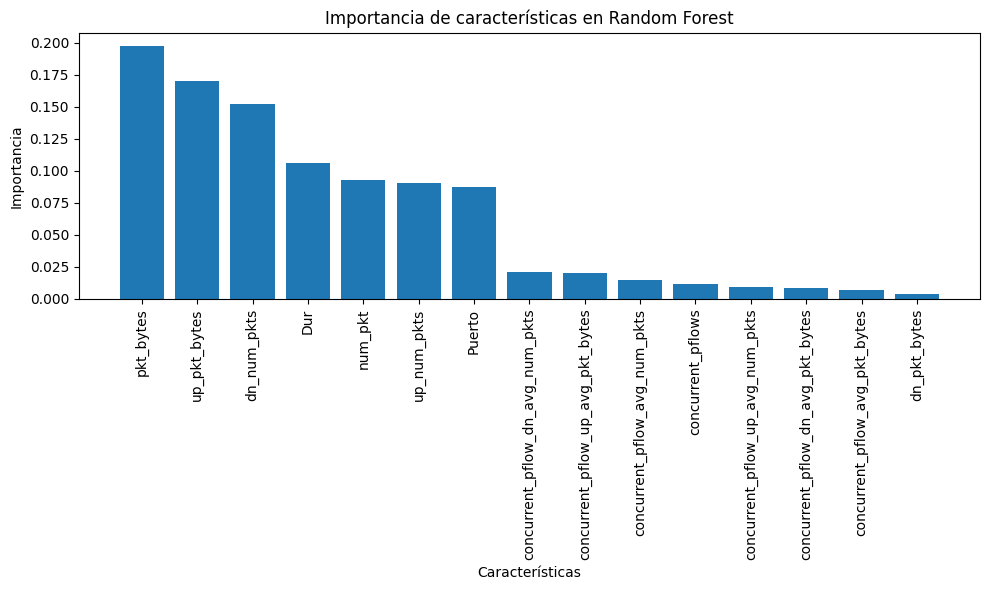

In [20]:
import matplotlib.pyplot as plt

# Obtener los nombres de las características
feature_names = feature_importances_sorted.index

# Obtener los valores de importancia de características
feature_importances = feature_importances_sorted.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características en Random Forest')
plt.tight_layout()
plt.savefig('random_forest.eps', format='eps')
plt.show()


# ISOLATION FOREST

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

# Entrenar el modelo de Isolation Forest con los datos normales
modelo = IsolationForest(contamination=0.0046)                            #con 0.005
modelo.fit(train_prep)


test = pd.concat([X_train_prep, y_train], axis=1)
test['target'] = test['target'].replace({1: 0, 2: 1})








# Obtener las predicciones del modelo para los datos de prueba
predicciones = modelo.predict(test.drop('target', axis=1))

print("Total de anomalías identificadas:", len(test['target'][predicciones==-1]))

# Verdaderos y falsos positivos de casos fraudulentos
print(test['target'][predicciones==-1].value_counts())

# Convertir las predicciones a etiquetas (0: normal, 1: anomalía)
etiquetas_predichas = [0 if p == 1 else 1 for p in predicciones]

# Obtener las etiquetas originales
etiquetas_originales = test['target']

# Calcular el F1-score
f1 = f1_score(etiquetas_originales, etiquetas_predichas)

# Imprimir el resultado del F1-score
print("F1-score:", f1)

# Calcular la precisión
precision = precision_score(etiquetas_originales, etiquetas_predichas)
print("Precisión:", precision)

# Calcular el recuerdo
recall = recall_score(etiquetas_originales, etiquetas_predichas)
print("Recall:", recall)



## EllipticEnvelope

## TRAIN

In [34]:
#bueno 00001 -> 17
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score, precision_score, recall_score

# Cargar los datos y preparar el conjunto de entrenamiento
# ...

# Crear el modelo de EllipticEnvelope
modelo = EllipticEnvelope(contamination=0.00001)  # Valor de contaminación del 0.005
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(train_prep)


test = pd.concat([X_train_prep, y_train], axis=1)
test['target'] = test['target'].replace({1: 0, 2: 1})




# Obtener las predicciones del modelo para los datos de prueba
predicciones = modelo.predict(test.drop('target', axis=1))

print("Total de anomalías identificadas:", len(test['target'][predicciones==-1]))

# Verdaderos y falsos positivos de casos fraudulentos
print(test['target'][predicciones==-1].value_counts())

# Convertir las predicciones a etiquetas (0: normal, 1: anomalía)
etiquetas_predichas = [0 if p == 1 else 1 for p in predicciones]

# Obtener las etiquetas originales
etiquetas_originales = test['target']

# Calcular el F1-score
f1 = f1_score(etiquetas_originales, etiquetas_predichas)

# Imprimir el resultado del F1-score
print("F1-score:", f1)

# Calcular la precisión
precision = precision_score(etiquetas_originales, etiquetas_predichas)
print("Precisión:", precision)

# Calcular el recuerdo
recall = recall_score(etiquetas_originales, etiquetas_predichas)
print("Recall:", recall)


Total de anomalías identificadas: 17
1    17
Name: target, dtype: int64
F1-score: 0.425
Precisión: 1.0
Recall: 0.2698412698412698


## REPRESENTACIONES

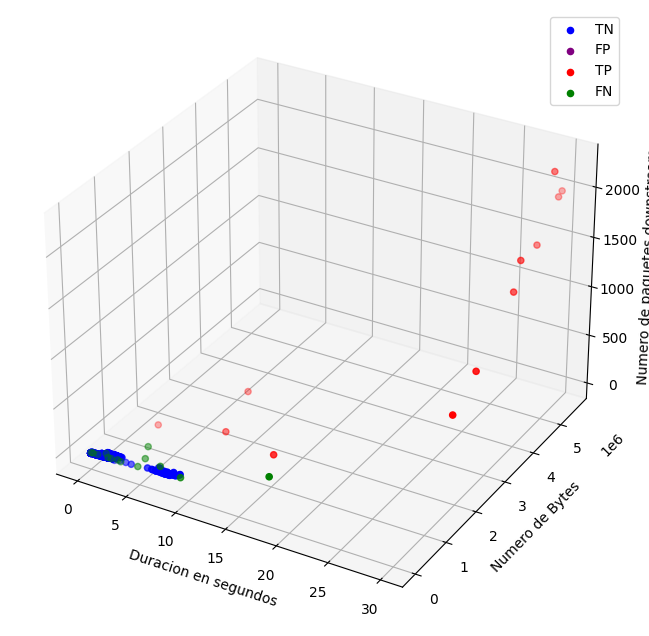

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


'''

# Definir la condición
condicion = (etiquetas_originales== 0) & (predicciones == 1)

# Obtener los índices de las filas que cumplen la condición en 'test'
indices_a_eliminar = test[condicion].sample(frac=0.7).index

# Eliminar las filas seleccionadas de 'test'
test1 = test.drop(indices_a_eliminar)

condicion = (etiquetas_originales== 1) & (predicciones == 1)
indices_a_eliminar = test[condicion].sample(frac=0.3).index
test1 = test1.drop(indices_a_eliminar)

'''





# Obtener las características que deseas visualizar en el gráfico tridimensional
caracteristica1 = test['Dur']
caracteristica2 = test['pkt_bytes']
caracteristica3 = test['dn_num_pkts']



# Crear una figura en 3D
fig = plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')

ax.scatter(caracteristica1[(etiquetas_originales==0) & (predicciones==1)], caracteristica2[(etiquetas_originales==0) & (predicciones==1)], caracteristica3[(etiquetas_originales==0) & (predicciones==1)], c='blue', label='TN')
ax.scatter(caracteristica1[(etiquetas_originales==0) & (predicciones==-1)], caracteristica2[(etiquetas_originales==0) & (predicciones==-1)], caracteristica3[(etiquetas_originales==0) & (predicciones==-1)], c='purple', label='FP')
ax.scatter(caracteristica1[(etiquetas_originales==1) & (predicciones==-1)], caracteristica2[(etiquetas_originales==1) & (predicciones==-1)], caracteristica3[(etiquetas_originales==1) & (predicciones==-1)], c='red', label='TP')
ax.scatter(caracteristica1[(etiquetas_originales==1) & (predicciones==1)], caracteristica2[(etiquetas_originales==1) & (predicciones==1)], caracteristica3[(etiquetas_originales==1) & (predicciones==1)], c='green', label='FN')
# Configurar etiquetas y leyenda
ax.set_xlabel('Duracion en segundos')
ax.set_ylabel('Numero de Bytes')
ax.set_zlabel('Numero de paquetes downstream')
ax.legend()
plt.savefig('eliptic_01.png', format='png')
# Mostrar el gráfico en 3D

#ax.set_xlim([0, 10])
#ax.set_ylim([0, 400000])
#ax.set_zlim([0, 500])
plt.show()


In [ ]:
ax.scatter(caracteristica1[(etiquetas_originales==0) & (predicciones==1)], caracteristica2[(etiquetas_originales==0) & (predicciones==1)], caracteristica3[(etiquetas_originales==0) & (predicciones==1)], c='blue', label='TN')
ax.scatter(caracteristica1[(etiquetas_originales==0) & (predicciones==-1)], caracteristica2[(etiquetas_originales==0) & (predicciones==-1)], caracteristica3[(etiquetas_originales==0) & (predicciones==-1)], c='purple', label='FP')
ax.scatter(caracteristica1[(etiquetas_originales==1) & (predicciones==-1)], caracteristica2[(etiquetas_originales==1) & (predicciones==-1)], caracteristica3[(etiquetas_originales==1) & (predicciones==-1)], c='red', label='TP')
ax.scatter(caracteristica1[(etiquetas_originales==1) & (predicciones==1)], caracteristica2[(etiquetas_originales==1) & (predicciones==1)], caracteristica3[(etiquetas_originales==1) & (predicciones==1)], c='red', label='FN')

## TEST

In [80]:
#bueno 0.000001 -> 12
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score, precision_score, recall_score

# Cargar los datos y preparar el conjunto de entrenamiento
# ...

# Crear el modelo de EllipticEnvelope
modelo = EllipticEnvelope(contamination=0.000001)  # Valor de contaminación del 0.005

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(train_prep)


test = pd.concat([X_test_prep, y_test], axis=1)
test['target'] = test['target'].replace({1: 0, 2: 1})




# Obtener las predicciones del modelo para los datos de prueba
predicciones = modelo.predict(test.drop('target', axis=1))

print("Total de anomalías identificadas:", len(test['target'][predicciones==-1]))

# Verdaderos y falsos positivos de casos fraudulentos
print(test['target'][predicciones==-1].value_counts())

# Convertir las predicciones a etiquetas (0: normal, 1: anomalía)
etiquetas_predichas = [0 if p == 1 else 1 for p in predicciones]

# Obtener las etiquetas originales
etiquetas_originales = test['target']

# Calcular el F1-score
f1 = f1_score(etiquetas_originales, etiquetas_predichas)

# Imprimir el resultado del F1-score
print("F1-score:", f1)

# Calcular la precisión
precision = precision_score(etiquetas_originales, etiquetas_predichas)
print("Precisión:", precision)

# Calcular el recuerdo
recall = recall_score(etiquetas_originales, etiquetas_predichas)
print("Recall:", recall)


Total de anomalías identificadas: 11
1    11
Name: target, dtype: int64
F1-score: 0.5789473684210525
Precisión: 1.0
Recall: 0.4074074074074074


## ELLIPTYC ENVELOPE UNIENDO TESTS

In [ ]:
# Crear el modelo de EllipticEnvelope
modelo = EllipticEnvelope(contamination=0.00001)  # Valor de contaminación del 0.005

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(train_prep)



test = pd.concat([X_test_prep, y_test], axis=1)
test['target'] = test['target'].replace({1: 0, 2: 1})
test1 = pd.concat([X_train_prep, y_train], axis=1)
test1['target'] = test1['target'].replace({1: 0, 2: 1})



# Unir los DataFrames verticalmente
concatenated_df = pd.concat([test, test1])


# Obtener las predicciones del modelo para los datos de prueba
predicciones = modelo.predict(concatenated_df.drop('target', axis=1))

print("Total de anomalías identificadas:", len(concatenated_df['target'][predicciones==-1]))

# Verdaderos y falsos positivos de casos fraudulentos
print(concatenated_df['target'][predicciones==-1].value_counts())

# Convertir las predicciones a etiquetas (0: normal, 1: anomalía)
etiquetas_predichas = [0 if p == 1 else 1 for p in predicciones]

# Obtener las etiquetas originales
etiquetas_originales = concatenated_df['target']

# Calcular el F1-score
f1 = f1_score(etiquetas_originales, etiquetas_predichas)

# Imprimir el resultado del F1-score
print("F1-score:", f1)

# Calcular la precisión
precision = precision_score(etiquetas_originales, etiquetas_predichas)
print("Precisión:", precision)

# Calcular el recuerdo
recall = recall_score(etiquetas_originales, etiquetas_predichas)
print("Recall:", recall)


# PERCEPTRON MULTICAPA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score




data = pd.concat([X_train_prep, y_train], axis=1)
data['target'] = data['target'].replace({1: 0, 2: 1})

data2 = pd.concat([X_test_prep, y_test], axis=1)
data2['target'] = data2['target'].replace({1: 0, 2: 1})


# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('target', axis=1)
y = data['target']

X_t = data2.drop('target', axis=1)
y_t = data2['target']




# Crear y entrenar el modelo de perceptrón multicapa
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=100)
model.fit(X, y)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_t)

# Calcular la precisión, recall y F1-score
precision = precision_score(y_t, y_pred)
recall = recall_score(y_t, y_pred)
f1 = f1_score(y_t, y_pred)

print("Precisión: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
